In [3]:
import psycopg2
import folium 
import pandas as pd

# Define your database connection parameters
db_params = {
    'host': '',
    'port': '6379',
    'dbname': '',  # Use 'dbname' instead of 'database' for psycopg2
    'user': '',
    'password': ''}

### Heatmaps for HARSH CORNERING, ACCELERATING, BRAKING

/tmp/ipykernel_24890/2410607498.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


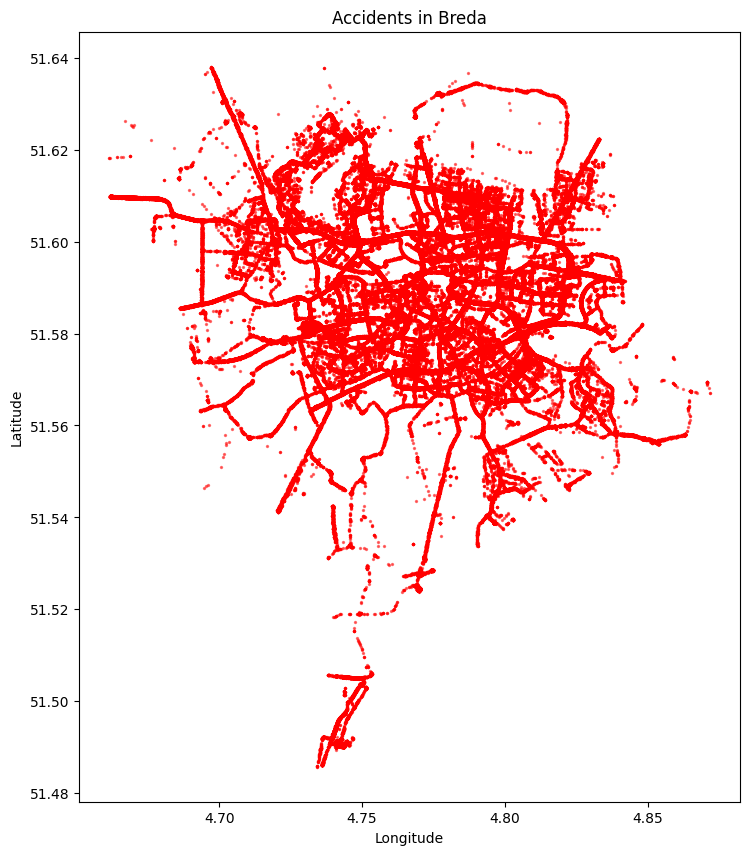

In [2]:
import psycopg2
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point



# Establish connection to the database
conn = psycopg2.connect(**db_params)

# Fetch the accident data with relevant columns
query = """
SELECT 
    latitude, 
    longitude
FROM 
    group12_warehouse.safe_driving 
WHERE 
    latitude IS NOT NULL AND longitude IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system to WGS84 (lat/lon)
gdf.set_crs(epsg=4326, inplace=True)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='red', alpha=0.5, markersize=2)

# Customize the plot
ax.set_title('Accidents in Breda')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


#### Heatmap for Harsh cornering 

In [23]:

from folium.plugins import HeatMap
# Coordinates for Breda
breda_coords = (51.5866, 4.776)

# Initialize the map at Breda
m = folium.Map(location=breda_coords, zoom_start=3)

# Establish database connection and execute query
conn = psycopg2.connect(**db_params)
query = "SELECT latitude, longitude, category FROM group12_warehouse.safe_driving WHERE category = 'HARSH CORNERING';"
df = pd.read_sql_query(query, conn)
conn.close()

# Create a heat map
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map in the Jupyter notebook
m


/tmp/ipykernel_36647/4050993427.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


### Heatmap for SPPED 
- the tables is empty 

In [30]:

from folium.plugins import HeatMap
# Coordinates for Breda
breda_coords = (51.5866, 4.776)

# Initialize the map at Breda
m = folium.Map(location=breda_coords, zoom_start=25)

# Establish database connection and execute query
conn = psycopg2.connect(**db_params)
query = "SELECT latitude, longitude, category FROM group12_warehouse.safe_driving WHERE category = 'SPPED';"
df = pd.read_sql_query(query, conn)
conn.close()

# Create a heat map
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map in the Jupyter notebook
print(df)


Empty DataFrame
Columns: [latitude, longitude, category]
Index: []


/tmp/ipykernel_36647/1155340950.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


#### Heatmap for Accelerating 

In [5]:

from folium.plugins import HeatMap
# Coordinates for Breda
breda_coords = (51.5866, 4.776)

# Initialize the map at Breda
m = folium.Map(location=breda_coords, zoom_start=15)

# Establish database connection and execute query
conn = psycopg2.connect(**db_params)
query = "SELECT latitude, longitude, category FROM group12_warehouse.safe_driving WHERE category = 'ACCELERATING';"
df = pd.read_sql_query(query, conn)
conn.close()

# Create a heat map
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map in the Jupyter notebook
m


/tmp/ipykernel_37748/1831707444.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


#### Heatmap for Braking 

In [28]:

from folium.plugins import HeatMap
# Coordinates for Breda
breda_coords = (51.5866, 4.776)

# Initialize the map at Breda
m = folium.Map(location=breda_coords, zoom_start=15)

# Establish database connection and execute query
conn = psycopg2.connect(**db_params)
query = "SELECT latitude, longitude, category FROM group12_warehouse.safe_driving WHERE category = 'BRAKING';"
df = pd.read_sql_query(query, conn)
conn.close()

# Create a heat map
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map in the Jupyter notebook
m


/tmp/ipykernel_36647/1731107483.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
